<a href="https://colab.research.google.com/github/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/Copy_of_3_street_grid_orientations_CFediting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Orientation within street grid maps** ##

This practical class aims to help you to further interpret place and space in archaeology. This week, we'll explore Urban Landscape and more specifically how urbanisation can define the shape of modern cities. Through two contrasting examples, you’ll make use of open source data, and start thinking, qualifying and quantifying the diverse layout of modern cities. 

<font color='magenta'> ~ new ~</font> This practical lab will provide you ways to do so by:
   * using orientation to explore spatial patterns;
   * using classification of multiple variables to understand clusters in space;
   * **need to expand**

### Getting started #### 
<font color='orangered'> ~ déjà vu ~</font> Make your own copy of this notebook. 

<font color='magenta'> ~ new ~</font> Most basic tools we need are pre-installed in google ColabReseach. The tools for this exercise are not, so we need to do some extra setup. 


### Install `libspatialindex` -- run once per on startup

In [8]:
# Most basic tools we need are pre-installed in google colab. The tools for this exercise are not, so we need to do some extra setup. 
# Run this cell to install some necessary libraries. Then move on.
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz 2>/dev/null | tar xz
!apt-get install -qq g++ make
import os
os.chdir('/content/spatialindex-src-1.8.5')
!mount -o remount,exec /content
!./configure 2>&1 >/dev/null && make 2>&1 >/dev/null && make install && ldconfig
!pip install -q rtree

!pip install geopandas

!pip install osmnx

mount: /content: mount point not mounted or bad option.
./configure: line 6204: /usr/bin/file: No such file or directory
/content/spatialindex-src-1.8.5/missing: Unknown `--is-lightweight' option
Try `/content/spatialindex-src-1.8.5/missing --help' for more information
configure: WARNING: 'missing' script is too old or missing
Making install in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Enterin

###Getting your tools

In [0]:
#codecell_StreetGridOrientations_ImportUrLibraries

# Now get the tools we need,as usual

from rtree import index
from rtree.index import Rtree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# note that osmnx is the special tool here - it contains data on street networks and tools for analysing that data
import osmnx as ox
ox.config(log_console=True, use_cache=True)
weight_by_length = False

### **Learning a new language – decomposing the code**
in #codecell_StreetGridOrientations_ImportUrLibraries:

<font color='orangered'> ~ déjà vu ~</font> So all libraries you have worked with are detailed in the Webmaps and Distributions notebook's lexicode.  

<font color='magenta'> ~ new ~</font> This week, you will still be working with some of these libraries, two packages should be further highlighted:
* **rtree** is a spatial index library that allows you to import spatial analysis by number (a bit like ordering food by number!). Details can be viewed [here](http://toblerity.org/rtree/), this week we'll focus on **xxx**;
* **osmnx** is a valuable Python package, and it is open source. We should therefore  cite Geoff Boeing's work and [paper](https://geoffboeing.com/publications/osmnx-complex-street-networks/)*'OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks'*. The package allows you to download administrative boundary shapes (geometries) and street networks from OpenStreetMap from which you can construct, project, visualise, and analyse complex street networks. Because OSMnx is built on top of NetworkX, matplotlib, and geopandas - that you have already used labs- the network analysis and spatial queries generation with R-tree is rich and fast. Further OsMnx documentation can be found [here](https://osmnx.readthedocs.io/en/stable/).

## **Assessing street grid orientations** ##

The origin and spread of cities can be studied as a function of their distribution, position, site, function and anatomy (Stanislawski D., 1946, [ref]( www.jstor.org/stable/211076)). In this practical lab, we will compare modern street grid orientations.
>>
<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fgeoffboeing.com%2Fwp-content%2Fuploads%2F2017%2F04%2Fsquare-mile-street-networks-1024x822.jpg&f=1&nofb=1" width="400"/> </div> 
>
*Geoff Boeing - Urban Form Analysis with OpenStreetMap Data*
>>
We start by choosing two cities. I've chosen Rome and Milan. If you've been to these cities, recall how the streets are organized. Are they laid out in neat parallel lines? Are there dominant directions in which the streets run? 


In [0]:
##codecell_StreetGridOrientations_listing

# Here we are making a list using {} of all the places we want to study. We give a short name - or label - to each place name. 
# We use the format of 'label' : 'query' where the query is the full name of the place as written in our osmnx data source

places = {'Rome'       : 'Rome,Italy',
          'Milan'        : 'Milan,Italy'
          }

Now, we can do a basic check of the data contained in our list of places. 



In [0]:
##codecell_StreetGridOrientations_geodataframe

# create a geodataframe 'gdf' that lists the information from each of the places we've added to our list above
gdf = ox.gdf_from_places(places.values())
#type the name of the geodataframe to print it out
gdf

To analyse urban street orientations for one city, start by getting a polygon that describes the shape of a city. In this case, we're getting the data for Rome. We need to know the overall shape and spatial limits of the city to run this analysis.

In [0]:
##codecell_StreetGridOrientations_shapeofgeodataframe

#Get the data for Rome
city = ox.gdf_from_place('Rome, Italy')
#Plot the shape data on the map
ox.plot_shape(ox.project_gdf(city))

### **Learning a new language – decomposing the code**
As we are working with place and space, in #codecell_StreetGridOrientations_geodataframe, you have been creating a GeoDataFrame (using pandas) which is simply a dataFrame of Rome and Milan streets that has a column with geometry. The dataframe called under <font color='magenta'> ox gdf = ox.gdf_from_place()</font> provides you with their geographical extents are provided under *'bbox_north, bbox_south, bbox_east and bbox_west columns'*. A column *'geometry'* containing their geometries is populated. It describes them as polygons & multipolygons with a latitude and longitude. 
In #codecell_StreetGridOrientations_shapeofgeodataframe you have generated a plot of Rome containing multipolygon features which is often the case when places are split by landscape (e.g.rivers,etc), or different areas may have other geo-political zones as it the case for Rome with the Vatican. 
>
 **why does it matter?**
Topology characterisation is important in geographical information systems (GIS) for:
* spatial functions (e.g. network routing via linear networks)
* better data quality and integrity control 
* creating topological relationships between features.
A coordinate-based data model that represents geographic features as points, lines and polygones is called a vector model in GIS:
>
>
<img src="https://github.com/Francoz-Charlotte/Spatial_teaching_CFediting/blob/master/GISfeatures.png?raw=1" width="400"/> </div>


Now we need to consider how to check the orientation of a line. Imagine a straight vertical line. Does it run up (toward 0 on a circle) or down (toward 180 on a circle)? Of course, really it does both! To assess orientations we can decide that any street recorded as running down (values between 90 and 270 on a circle) will be reversed so that they are analysed as if they run up.

In [0]:
# reverse all downward running streets so they act as if they run up...
def reverse_bearing(x):
    return x + 180 if x < 180 else x - 180

Next we will get the bearing, or main orientation, of each line representing a street in Rome

In [0]:
#define an empty set to hold information on all the bearings of the streets
bearings = {}
#for each city
for place in sorted(places.keys()):
    
    # get the graph of all the streets
    query = places[place]
    G = ox.graph_from_place(query, network_type='drive')
    
    # calculate edge bearings of the lines representing streets
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    
    if weight_by_length:
        # weight bearings by length (meters)
        city_bearings = []
        for u, v, k, d in Gu.edges(keys=True, data=True):
            city_bearings.extend([d['bearing']] * int(d['length']))
        b = pd.Series(city_bearings)
        bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')
    else:
        # don't weight bearings, just take one value per street segment
        b = pd.Series([d['bearing'] for u, v, k, d in Gu.edges(keys=True, data=True)])
        bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')

Now we will count the number of streets with each orientation.

In [0]:
# here (and above and just below) you are defining a function, a little script that runs repeatedly on all your data

def count_and_merge(n, bearings):
    # make twice as many bins as desired, then merge them in pairs
    # prevents bin-edge effects around common values like 0° and 90°
    n = n * 2
    bins = np.arange(n + 1) * 360 / n
    count, _ = np.histogram(bearings, bins=bins)
    
    # move the last bin to the front, so eg 0.01° and 359.99° will be binned together
    count = np.roll(count, 1)
    return count[::2] + count[1::2]

Finally, we will draw a diagram that shows the number of streets running along each orientation. 

We'll be using a type of diagram called a 'polar plot'.

Read about them [here](https://datavizproject.com/data-type/polar-area-chart/). 

In [0]:
# create a function to draw a polar histogram for a set of edge bearings
def polar_plot(ax, bearings, n=36, title=''):
    
    #define bins to divide up the data
    bins = np.arange(n + 1) * 360 / n
    count = count_and_merge(n, bearings)
    _, division = np.histogram(bearings, bins=bins)
    frequency = count / count.sum()
    division = division[0:-1]
    width =  2 * np.pi / n
    # set north to 0 and work clockwise from there
    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')
    # set up colours, labels, and fonts for the diagram
    x = division * np.pi / 180
    bars = ax.bar(x, height=frequency, width=width, align='center', bottom=0, zorder=2,
                  color='#003366', edgecolor='k', linewidth=0.5, alpha=0.7)
    
    ax.set_ylim(top=frequency.max())
    
    title_font = {'family':'Arial', 'size':24, 'weight':'bold'}
    xtick_font = {'family':'Arial', 'size':10, 'weight':'bold', 'alpha':1.0, 'zorder':3}
    ytick_font = {'family':'Arial', 'size': 9, 'weight':'bold', 'alpha':0.2, 'zorder':3}
    
    ax.set_title(title.upper(), y=1.05, fontdict=title_font)
    
    ax.set_yticks(np.linspace(0, max(ax.get_ylim()), 5))
    yticklabels = ['{:.2f}'.format(y) for y in ax.get_yticks()]
    yticklabels[0] = ''
    ax.set_yticklabels(labels=yticklabels, fontdict=ytick_font)
    
    xticklabels = ['N', '', 'E', '', 'S', '', 'W', '']
    ax.set_xticklabels(labels=xticklabels, fontdict=xtick_font)
    ax.tick_params(axis='x', which='major', pad=-2)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


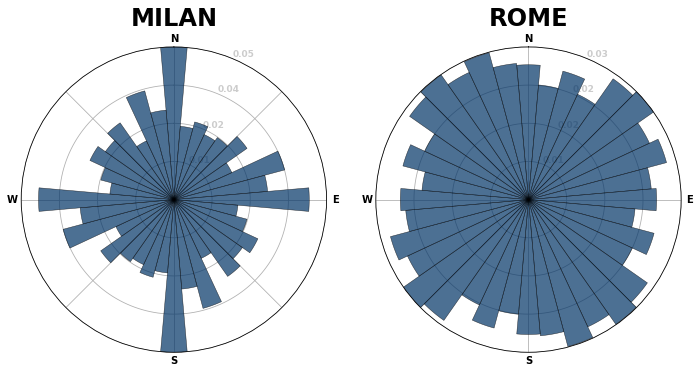

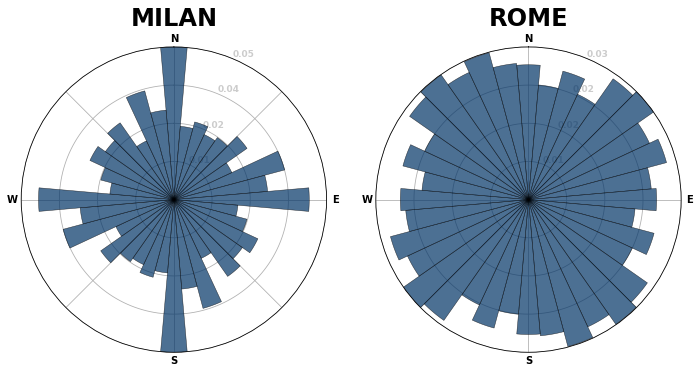

In [17]:
# create the figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={'projection':'polar'})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    polar_plot(ax, bearings[place].dropna(), title=place)

# add super title and save full image

fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig

Are the orientations seen here similar or different? What might you conclude about the development and organization from each city based on these diagrams?

***here perhaps ask question**:which other useful plots, diagram could also be used to quantify of street orientation ? 
* polar plots and rose diagrams — data that includes and implicit or explicit directional or temporal component can often be displayed most effectively using a plot that uses polar coordinates rather than Cartesian coordinates. 
* Bubble plots** — bubble plots are essentially scatterplots where the data items have an additional value or weighting (a third dimension) to be displayed. This is achieved by varying the size and/or color of the points. Note that the first two dimensions may be variables or spatial coordinates, with the third dimension being the additional variable. Some software tools display the bubbles as pseudo-3D objects, i.e. looking like bubbles or shaded balls. In the diagram below a bubble plot has been created using polar data, with random location and size, and colors determined by the angle of rotation. Bubble transparency has been set to 75% (from MatPlotLib, Python language examples)




Now that you've started thinking about orientation and how we might interpret it, head to the next notebook (linked from the moodle) for a slightly more in depth exercise.

#LexiCode
To re-use the codes - you will need to first load their respective libraries.  So farr you have used 

<br>

> **libraries** |
>folium | branca| pandas| geopandas| seaborn | matplotlib.pyplot | numpy | rtree | osmnx |
>
> **plugins** |
>HeatMapWithTime |HeatMap | MeasureControl | PrepareUrBasemaps_CreateLayers from [folium.plugins]


<br>

>Lexicode_MakingaBasicMap | Lexicode_Webmaps&Distributions |Lexicode_StreetGridOrientations
>--- | --- | ---|
>	==   () [] | pd.concat() | { } *subselection from list*
>.head_csv() | .dtype()
>.read_csv() | astype()
>mean()  | fillna()
>folium.Map | def return
>range() | .apply(lambda x:*function*,axis=)
>len() | pd.merge()
>iloc[]| how= , left_index= ,left_index= 
>.value_counts()| gpd.GeoDataFrame()
>if =:| geometry=gpd.points_from_xy
>elif =: |print() 
>else =:| .isin()
>folium.Marker()| classic.plot()
>folium.Icon()| generateBaseMap()
>folium.Circle| .groupby(['', ''])
>popup= | .reset_index()
>radius= |  max_zoom=
>.values.tolist() |folium.TileLayer()
> .add_to()| plugins.DualMap(location= , tiles= , zoom_start= )
>  | 


